# Development scratchbook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import etfs as et

/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from etfs.security.io import read_yahoo_csv, retrieve_yahoo_quote, get_company_name
from etfs.stats.basics import resample_df, runrate_column, shift_column, returns_column, \
                              difference, rsq, beta, alpha, standard_deviation_column
from etfs.utils.helpers import todays_date
from etfs.visualization.trends import plot_trend, plot_candlestick, plot_ewm
from etfs.treasury.io import retrieve_treasury_yield_curve_rates

## Retrieve quotes from Yahoo! Finance

In [ ]:
df = retrieve_yahoo_quote(ticker='VO', startdate='19000101', enddate='20180204')

In [ ]:
df.head()

## Alternatively: read in files

In [ ]:
filepath = '../data/VO.csv'

In [ ]:
df = read_yahoo_csv(path=filepath)

In [ ]:
df.head(5)

## First look at the data

In [ ]:
df[['Close', 'Adj Close']].plot()

## Compare several securities

In [ ]:
#filepath = '../data/VOO.csv'
#df2 = read_yahoo_csv(path=filepath)
df2 = retrieve_yahoo_quote(ticker='VOO', enddate=todays_date())

In [ ]:
#filepath = '../data/VNQ.csv'
#df3 = read_yahoo_csv(path=filepath)
df3 = retrieve_yahoo_quote(ticker='VNQ', enddate=todays_date())

In [ ]:
plt.plot(df.index, df.Close, label='VO')
plt.plot(df2.index, df2.Close, label = 'VOO')
plt.plot(df3.index, df3.Close, label='VNQ')
plt.legend()

## Play with some basic time series functions

### Run rate

In [ ]:
df = runrate_column(df, column='Close', window=50)
df = runrate_column(df, column='Close', window=200)

In [ ]:
plt.plot(df.index, df.Close)
plt.plot(df.index, df.Close_rr50)
plt.plot(df.index, df.Close_rr200)

### Resampling

In [ ]:
df_m = resample_df(df, column='Close', resolution='M')
df_y = resample_df(df, column='Close', resolution='12M')

In [ ]:
plt.plot(df.index, df.Close)
plt.plot(df_m.index, df_m.Close['mean'])
plt.plot(df_y.index, df_y.Close['mean'])

In [ ]:
df_y.head(5)

### Volatility

In [ ]:
df = standard_deviation_column(df, column='Close', window=1, shift=1)

In [ ]:
df2 = standard_deviation_column(df2, column='Close', window=1, shift=1)

In [ ]:
df3 = standard_deviation_column(df3, column='Close', window=1, shift=1)

In [ ]:
df_m = resample_df(df, column='Close_sh1_sqerr', resolution='7D')
df2_m = resample_df(df2, column='Close_sh1_sqerr', resolution='7D')
df3_m = resample_df(df3, column='Close_sh1_sqerr', resolution='7D')

In [ ]:
plt.plot(df3_m.index, np.sqrt(df3_m.Close_sh1_sqerr['mean'])+.2, label='VNQ')
plt.plot(df_m.index, np.sqrt(df_m.Close_sh1_sqerr['mean'])+.1, label='VO')
plt.plot(df2_m.index, np.sqrt(df2_m.Close_sh1_sqerr['mean']), label='VOO')
plt.legend()
plt.ylabel('Volatility')
plt.yticks([]);

## Differences in time

In [ ]:
startdate = '2017-01-03'
enddate   = '2017-02-09'

In [ ]:
df_plot = df.loc[(df.index >= startdate) & (df.index <= enddate), :]
plt.plot(df_plot.index, df_plot.Close)

In [ ]:
difference(df=df, column='Close', start=startdate, end=enddate)

## Security class

In [ ]:
VO = et.Security('VO', start='2017-01-01', end='2017-12-31')
VOO = et.Security('VOO', start='2017-01-01', end='2017-12-31')
VNQ = et.Security('VNQ', start='2017-01-01', end='2017-12-31')

In [ ]:
VO.ticker, VOO.ticker, VNQ.ticker

In [ ]:
VNQ.refresh()

### Load data either from file or from Yahoo!

In [ ]:
VO.load(start='2017-01-01', end='2017-12-31')
VOO.load(start='2017-01-01', end='2017-12-31')

In [ ]:
difference(df=VO.data, column='Close', start='2017-01-01', end='2017-01-30')

In [ ]:
difference(df=VOO.data, column='Close', start='2017-01-01', end='2017-01-30')

### Name class instance

In [ ]:
VO.name = 'Vanguard Mid Cap ETF'

In [ ]:
VO.name

In [ ]:
VO.set_name('VO')

In [ ]:
VO.name

In [ ]:
print(VO)

### Last price in data

In [ ]:
VO.get_last_price('Close')

In [ ]:
VO.last_price

### Plot outliers

In [ ]:
df_high = VNQ.data.loc[VNQ.data.Close >= VNQ.mean_price + VNQ.std_price]
df_low = VNQ.data.loc[VNQ.data.Close <= VNQ.mean_price - VNQ.std_price]

In [ ]:
plt.plot(VNQ.data.index, VNQ.data.Close)
plt.scatter(df_high.index, df_high.Close)
plt.scatter(df_low.index, df_low.Close)

### Refresh data (and save as csv)

In [ ]:
VO.refresh()

In [ ]:
VOO.refresh()

### Calculate returns

In [ ]:
returns_column(df=VO.data, column='Close').head()

In [ ]:
VO.get_returns()

### R squared between two securities

In [ ]:
rsq(sec1=VOO, sec2=VO, col1='Close', col2='Close')

In [ ]:
rsq(sec1=VNQ, sec2=VO, col1='Close', col2='Close')

In [ ]:
VO.get_returns()

In [ ]:
VOO.get_returns()

In [ ]:
VNQ.get_returns()

In [ ]:
rsq(sec1=VOO, sec2=VO, col1='Return', col2='Return')

In [ ]:
rsq(sec1=VNQ, sec2=VO, col1='Return', col2='Return')

### Calculate beta of a security against a benchmark

In [ ]:
VO.get_benchmark()

In [ ]:
VO.benchmark.get_returns()

In [ ]:
beta(sec1=VO, sec2=VO.benchmark, col1='Return', col2='Return')

In [ ]:
VOO.get_benchmark()

In [ ]:
VOO.benchmark.get_returns()

In [ ]:
beta(sec1=VOO, sec2=VOO.benchmark, col1='Return', col2='Return')

### Calculate alpha of a security against a benchmark

In [ ]:
VO = et.Security('VO', start='2015-01-01', end='2017-12-31')

In [ ]:
VO.get_benchmark()

In [ ]:
VO.get_returns()

In [ ]:
alpha(sec1=VO, sec2=VO.benchmark, col1='Return', col2='Return', risk_free_rate=.004484)

### 50-day and 200-day rolling weighted averages for securities 

In [29]:
NFLX = et.Security('NFLX')

Checking ../data/NFLX.csv
Saving ../data/NFLX.csv


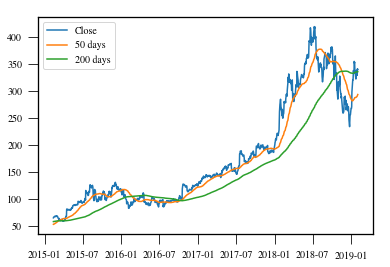

In [30]:
plot_trend(security=NFLX, windows=[50, 200], ndays=1000)

In [6]:
AMD = et.Security('AMD')

Checking ../data/AMD.csv
Saving ../data/AMD.csv


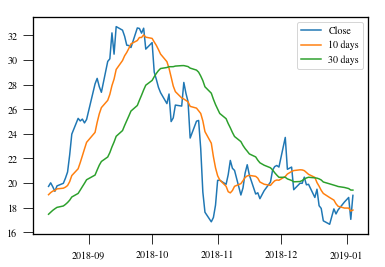

In [7]:
plot_trend(security=AMD, windows=[10, 30])

In [11]:
BIDU = et.Security('BIDU')

Checking ../data/BIDU.csv
Saving ../data/BIDU.csv


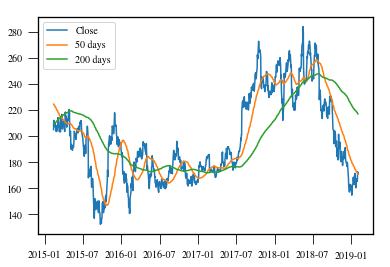

In [28]:
plot_trend(security=BIDU, windows=[50, 200], ndays=1000)

In [13]:
BABA = et.Security('BABA')

Checking ../data/BABA.csv
Saving ../data/BABA.csv


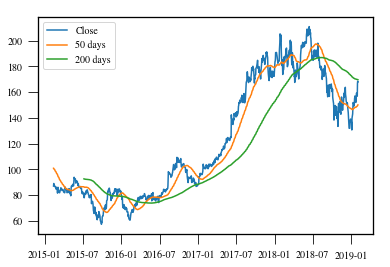

In [27]:
plot_trend(security=BABA, windows=[50, 200], ndays=1000)

In [24]:
W = et.Security('W')

Checking ../data/W.csv
Saving ../data/W.csv


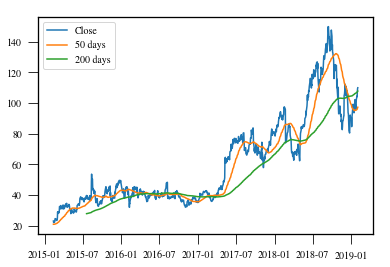

In [26]:
plot_trend(security=W, ndays=1000)

In [12]:
SP500 = et.Security('^GSPC')

Checking ../data/^GSPC.csv
Saving ../data/^GSPC.csv


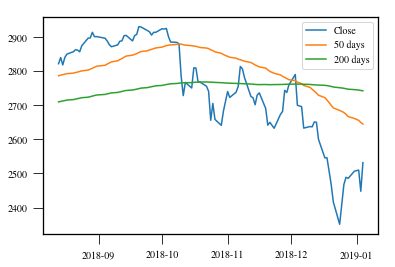

In [14]:
plot_trend(security=SP500, windows=[50, 200])

In [21]:
IQ = et.Security('IQ')

Checking ../data/IQ.csv
Saving ../data/IQ.csv


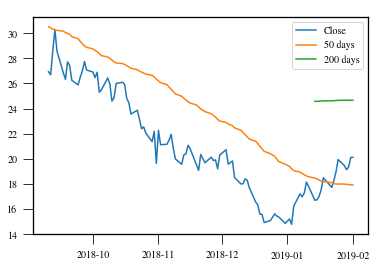

In [23]:
plot_trend(security=IQ, windows=[50, 200])

In [19]:
JD = et.Security('JD')

Checking ../data/JD.csv
Saving ../data/JD.csv


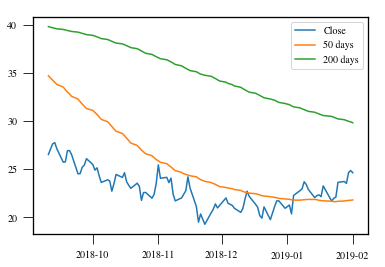

In [20]:
plot_trend(security=JD, windows=[50, 200])

In [17]:
SONO = et.Security('SONO', start='2018-01-01')

Checking ../data/SONO.csv
Saving ../data/SONO.csv


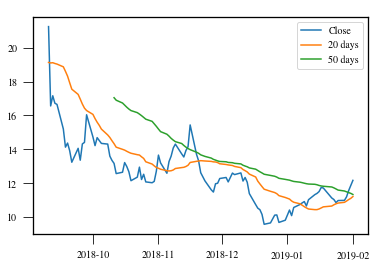

In [18]:
plot_trend(security=SONO, windows=[20, 50])

In [6]:
VOO = et.Security('VOO', start='2018-01-01')

Checking ../data/VOO.csv
Saving ../data/VOO.csv


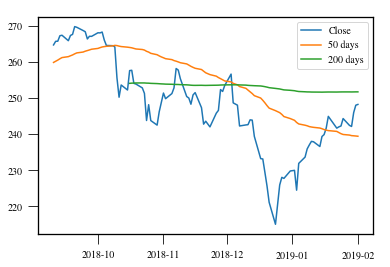

In [8]:
plot_trend(security=VOO, windows=[50, 200])

In [15]:
SNE = et.Security('SNE')

Checking ../data/SNE.csv
Saving ../data/SNE.csv


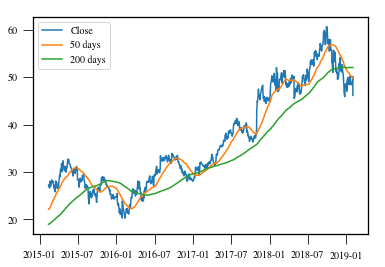

In [31]:
plot_trend(security=SNE, windows=[50, 200], ndays=1000)

### Exponentially weighted moving averages

In [4]:
FB = et.Security('FB')

Checking ../data/FB.csv
Saving ../data/FB.csv


In [ ]:
plot_ewm(security=FB, alphas=[.5, .1])

In [ ]:
plot_trend(security=FB, windows=[10, 30])

### Candlestick plot

In [4]:
AAPL = et.Security('AAPL', start='2008-01-02', end='2017-12-29')

Checking ../data/AAPL.csv


In [6]:
AAPL.data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,28.467142,28.608572,27.507143,27.834286,24.383644,269794688
2008-01-03,27.915714,28.198572,27.527143,27.847143,24.394909,210516608
2008-01-04,27.350000,27.571428,25.555714,25.721428,22.532711,363958016
2008-01-07,25.892857,26.228571,24.318571,25.377142,22.231115,518048288
2008-01-08,25.734285,26.065714,24.400000,24.464285,21.431419,380953984
2008-01-09,24.471428,25.642857,24.042856,25.628571,22.451372,453470496
2008-01-10,25.368572,25.857143,25.058571,25.431429,22.278667,370743808
2008-01-11,25.142857,25.407143,24.285715,24.670000,21.611633,308071392
2008-01-14,25.360001,25.631428,25.024286,25.540001,22.373783,275112608


In [5]:
AAPL.data.index.max()

Timestamp('2017-12-29 00:00:00')

In [ ]:
plot_candlestick(security=AAPL, 
                 open_col='Open',
                 close_col='Close',
                 high_col='High',
                 low_col='Low',
                 ndays=100,
                 heikin=False
                )

### Heikin-Ashi candlestick plot

In [ ]:
plot_candlestick(security=AAPL, 
                 open_col='Open',
                 close_col='Close',
                 high_col='High',
                 low_col='Low',
                 ndays=100,
                 heikin=True
                )

## Get Treasury Yield Curve rates

In [ ]:
df = retrieve_treasury_yield_curve_rates(startdate='20010101', enddate='20190105')

In [29]:
UST = et.Treasury(name='UST', start='2001-01-01')

Checking ../data/UST.csv
Saving ../data/UST.csv


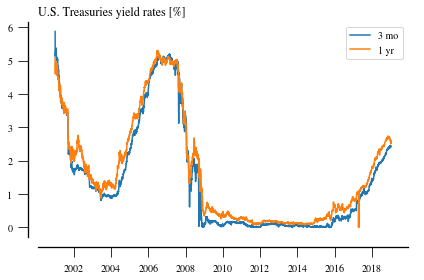

In [30]:
plt.plot(UST.data.index, UST.data['3 mo'])
plt.plot(UST.data.index, UST.data['1 yr'])
plt.legend()
plt.ylabel('')
plt.title('U.S. Treasuries yield rates [%]', loc='left', fontsize=12)
sns.despine(offset=10)
plt.tight_layout()

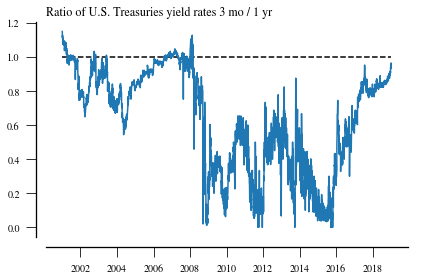

In [31]:
plt.plot(UST.data.index, UST.data['3 mo']/UST.data['1 yr'])
plt.hlines([1], xmin=UST.data.index.min(), xmax=UST.data.index.max(), linestyles='--')
plt.ylabel('')
plt.title('Ratio of U.S. Treasuries yield rates 3 mo / 1 yr', loc='left', fontsize=12)
sns.despine(offset=10)
plt.tight_layout()


## Portfolios

In [7]:
from etfs.portfolio.io import import_portfolio

In [29]:
test = et.Portfolio(name="test portfolio")

In [30]:
test = import_portfolio(path="../data/portfolio_test.csv", name="Test Portfolio")

Reading in ../data/portfolio_test.csv
depositing 1000.00 USD (new balance: 1000.00 USD)
Checking ../data/VOO.csv
Saving ../data/VOO.csv
Checking ../data/VOO.csv
Saving ../data/VOO.csv
buying 3.00 VOO (new balance: 196.27 USD)
Checking ../data/VO.csv
Saving ../data/VO.csv
Checking ../data/VO.csv
Saving ../data/VO.csv
buying 4.00 VO (new balance: -387.37 USD)
dividend VOO 5.92 USD (new balance: -381.45 USD)
selling 2.00 VO (new balance: -87.63 USD)
selling 1.00 VO (new balance: 60.26 USD)
dividend VO 0.92 USD (new balance: 61.16 USD)
selling 1.00 VOO (new balance: 427.18 USD)
depositing 1000.00 USD (new balance: 1427.16 USD)
Checking ../data/VNQ.csv
Saving ../data/VNQ.csv
Checking ../data/VNQ.csv
Saving ../data/VNQ.csv
buying 10.00 VNQ (new balance: 227.06 USD)
selling 5.00 VNQ (new balance: 892.26 USD)


In [31]:
test.overview()

        Quantity  AvgPriceAll  AvgPriceFiFo  AvgPriceLiFo  AvgPrice  \
Ticker                                                                
VNQ          5.0       120.01        120.01        120.01   106.980   
VO           1.0       145.91        145.91        145.91   141.910   
VOO          2.0       267.91        267.91        267.91   218.855   

         LastPrice  TradeValue  CurrentValue  Dividends      Return  \
Ticker                                                                
VNQ      87.400002      534.90    437.000008       0.00  -97.899992   
VO      167.160004      141.91    167.160004       0.92   26.170004   
VOO     269.149994      437.71    538.299988       5.92  106.509988   

                                       Description  
Ticker                                              
VNQ     Vanguard Real Estate Index Fund ETF Shares  
VO          Vanguard Mid-Cap Index Fund ETF Shares  
VOO                           Vanguard S&P 500 ETF  

Total portfolio value:

In [32]:
test.positions()

        Quantity  Bought  Sold  CurrentValue  Invested  Devested  Dividends  \
Ticker                                                                        
VOO          2.0     3.0  -1.0    538.299988    803.73   -366.02       5.92   
VNQ          5.0    10.0  -5.0    437.000008   1200.10   -665.20       0.00   
VO           1.0     4.0  -3.0    167.160004    583.64   -441.73       0.92   

            Return  PercentGrowth                                 Description  
Ticker                                                                         
VOO     106.509988      13.251961                        Vanguard S&P 500 ETF  
VNQ     -97.899992      -8.157653  Vanguard Real Estate Index Fund ETF Shares  
VO       26.170004       4.483929      Vanguard Mid-Cap Index Fund ETF Shares  


In [33]:
test.get_timeseries()

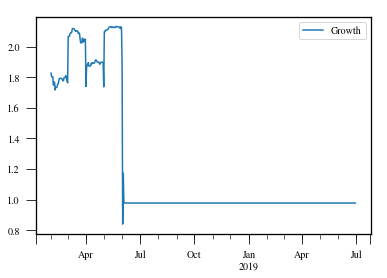

In [34]:
test.data_growth.plot(y='Growth')

In [28]:
test.data_growth.loc['2018-06-4', :]

Total              1955.720003
Total_deposited    2000.000000
Growth                0.977860
Name: 2018-06-04 00:00:00, dtype: float64